In [9]:
import numpy as np
import h5py as h5

import os
list_of_files = os.listdir('../data/')  
list_of_files = [s for s in list_of_files if '.h5' in s]

Папка Харука

In [29]:
for name in list_of_files:
    print(name)
    path_to_h5 = '../data/' + name
    with h5.File(path_to_h5, 'r') as hf:
        for key in hf.keys():
            print(key)
        print(hf['file_nums/test'][:])
        try:
            train_Shape = hf['train/ev_ids_corr/data'].shape
            test_Shape = hf['test/ev_ids_corr/data'].shape
            val_Shape = hf['val/ev_ids_corr/data'].shape
        except: pass
        print(train_Shape,test_Shape,val_Shape, '\n')
        print(hf['train/ev_ids_corr/data'][0:100])

baikal_multi_0523_flat_pureMC_h5s2_norm.h5
file_nums
norm_param
test
train
val
[12  5  5]
(5556146,) (465253,) (22345821,) 

[b'mu_1069_30063' b'nuatm_1024_41' b'nue2_1003_2_2' b'nue2_1008_1_3'
 b'nue2_1008_1_3' b'mu_1073_3632' b'mu_1101_39073' b'mu_1070_21142'
 b'nuatm_1027_42' b'mu_1032_2805' b'nue2_1004_0_5' b'nue2_1004_0_1'
 b'nuatm_1024_29' b'nue2_1000_3_1' b'mu_1020_8050' b'mu_1011_25248'
 b'nue2_1000_3_4' b'mu_1056_18737' b'mu_1091_14178' b'nue2_1000_1_7'
 b'nue2_1008_2_2' b'nuatm_1027_86' b'mu_1020_9774' b'nue2_1010_3_2'
 b'nuatm_1017_18' b'nue2_1004_0_1' b'mu_1020_38242' b'mu_1070_25338'
 b'mu_1070_12842' b'nue2_1002_2_6' b'nue2_1002_2_3' b'mu_1101_34166'
 b'mu_1133_39830' b'mu_1133_31300' b'nue2_1010_3_1' b'nue2_1013_2_1'
 b'nue2_1013_2_3' b'nue2_1000_1_2' b'nue2_1002_2_3' b'nue2_1013_2_4'
 b'mu_1032_9782' b'nue2_1003_2_6' b'nuatm_1027_25' b'nuatm_1011_20'
 b'mu_1073_24791' b'nue2_1002_2_3' b'nue2_1008_1_3' b'nue2_1010_3_3'
 b'mu_1011_7288' b'mu_1011_37873' b'mu_1028_23603' b

In [76]:
for name in ["baikal_mu-nu_h5-s2_tres08_old_norm.h5"]:
    path_to_h5 = '../../../../../ivkhar/Baikal/data/' + name
    with h5.File(path_to_h5, 'r') as hf:
        for key in hf.keys():
            print(key)
        train_Shape = hf['train/data/data'].shape
        test_Shape = hf['test/data/data'].shape
        val_Shape = hf['val/data/data'].shape
        print(name, train_Shape,test_Shape,val_Shape, '\n')
        print(hf['norm_param/mean'][:], '\n')
        print(hf['norm_param/std'][:], '\n')
        print( hf['train/data/data'][2,0:10,4], '\n')

aux_mask
norm_param
test
train
val
baikal_mu-nu_h5-s2_tres08_old_norm.h5 (16959713, 96, 5) (339979, 96, 5) (338797, 96, 5) 

[ 4.1610322e+00  1.2426184e+03 -7.2910535e-01  3.2516095e-01
  3.9073559e+01] 

[ 28.856903 506.03458   38.562126  38.77876  141.3174  ] 

[-0.22324748 -0.32951868 -0.4364129  -0.6488494  -0.86129326  3.
  3.          3.          3.          3.        ] 



In [77]:
with h5.File(path_to_h5, 'r') as hf:
    test_data = hf['test/data/data']
    ids = hf['test/ev_ids/data'][:]
    labels = np.zeros((len(ids), 2))# id of event - starting with 'nu' or 'mu'
    print(ids[0:5])
    ids = np.array([i[0] for i in ids])
    print(ids[0:5])
    labels[:, 1] = np.where(ids == 110, 1, 0)  # 110 - byte code for 'n'
    labels[:, 0] = np.where(ids == 109, 1, 0)  # 109 - byte code for 'm'

[b'nuatm_cl3_sep20_cors_1359.root_4' b'nuatm_cl3_sep20_cors_1359.root_13'
 b'nuatm_cl3_sep20_cors_1359.root_20' b'nuatm_cl3_sep20_cors_1359.root_26'
 b'nuatm_cl3_sep20_cors_1359.root_31']
[110 110 110 110 110]


In [5]:
print(np.where(labels[:,1] == 0))

(array([122737, 122738, 122739, ..., 339976, 339977, 339978]),)


In [6]:
with h5.File(path_to_h5, 'r') as hf:
    Es = hf['train/prime_prty/data'][:,2]
    labels = np.zeros((train_Shape[0],2))
    ids = hf['train/ev_ids/data'][:]  # id of event - starting with 'nu' or 'mu'
    ids = np.array([i[0] for i in ids])
    labels[:, 1] = np.where(ids == 110, 1, 0)  # 110 - byte code for 'n'
    labels[:, 0] = np.where(ids == 109, 1, 0)  # 109 - byte code for 'm'
    labels = labels[:,1]

In [12]:
E_nu = Es[np.nonzero(np.where(labels == 1., Es, 0))[0]]

In [13]:
E_nu[0:10]

array([ 419.91974 ,  139.72339 ,  877.2412  ,  123.846794,  480.39484 ,
       1791.7684  ,  368.18658 ,  515.03107 , 5484.124   ,  274.41272 ],
      dtype=float32)

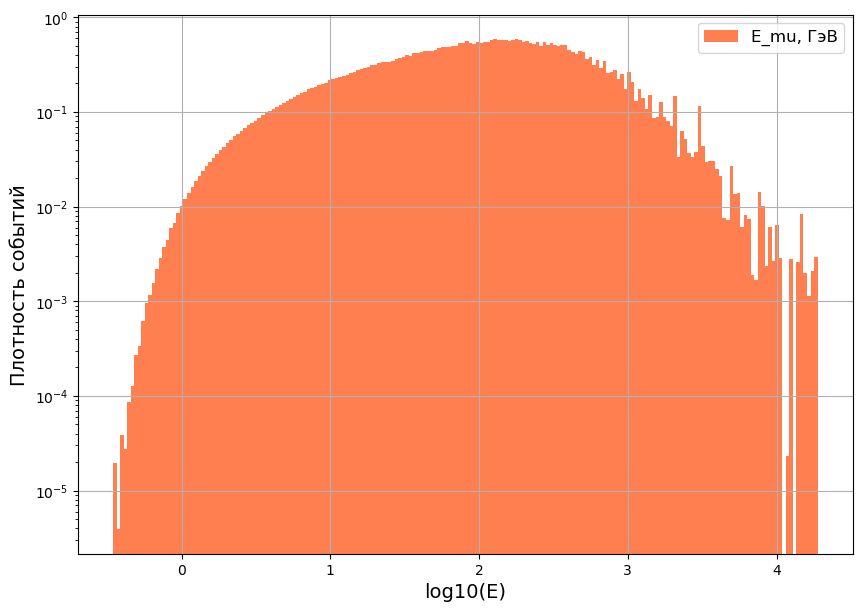

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.hist(np.log10(E_mu), bins = 200, 
         histtype = 'stepfilled', density = True, 
         log = True, color = 'coral', label = 'E_mu, ГэВ')
plt.xlabel('log10(E)', fontsize = 14)
plt.ylabel('Плотность событий', fontsize = 14)
plt.grid()
plt.legend(fontsize = 12)
plt.show()

In [ ]:
#### regime = 'train'
with h5.File(path_to_h5, 'r') as hf:
    labels = np.zeros((train_Shape[0],2))
    ids = hf[regime + '/ev_ids/data'][:]  # id of event - starting with 'nu' or 'mu'
    ids = np.array([i[0] for i in ids])
    labels[:, 1] = np.where(ids == 110, 1, 0)  # 110 - byte code for 'n'
    labels[:, 0] = np.where(ids == 109, 1, 0)  # 109 - byte code for 'm'
num_nu = len(np.where(labels[:,0] == 0)[0])
num_mu = len(np.where(labels[:,0] == 1)[0])

In [10]:
print(num_nu,num_mu,num_mu/num_nu)

6144790 10814923 1.7600150696769132


In [8]:
with h5.File(path_to_h5, 'r') as hf:
    data = hf['train/data/data'][:,:,4]
    mask = hf['train/mask/data'][0:1000]
    mask = np.expand_dims(mask,axis = -1)
    print(data.shape, mask.shape)
    data = np.concatenate((data,mask),axis = -1)
data = data[:,:,:-1]
print(data[6]*mask[6])

(1000, 96, 5) (1000, 96, 1)
[[-0.10636162 -1.715351   -1.040951    1.0626556  -0.8592693 ]
 [ 0.13740318 -1.6768655  -1.040951    1.0626556  -0.7530899 ]
 [-0.11919546 -1.54669    -1.040951    1.0626556  -0.64691067]
 [-0.09297085 -1.2395531  -0.06805364 -0.00945203 -0.54107094]
 [ 0.15590955 -1.2091594  -0.06805364 -0.00945203 -0.43483484]
 [-0.09755693 -1.0797055  -0.06805364 -0.00945203 -0.32859877]
 [-0.          0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          0.        ]
 [-0.          0.          0.          0.          0.        ]
 [-0.          0.          

In [ ]:
import tensorflow.keras.layers as tfl
print(tfl.MaxPooling1D((2), strides=2)(mask[0]))

2023-03-05 00:38:46.172498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 00:38:47.132176: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/albert/miniconda3/envs/Baikal2/lib/
2023-03-05 00:38:47.132263: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/albert/miniconda3/envs/Baikal2/lib/
2023-03-05 00:38:47.132272: W tensorflow/com

Папка моя

In [80]:
import numpy as np
import h5py as h5

name = 'baikal_multi_0523_flat_pureMC_h5s2_norm.h5'
path_to_h5 = '../data/' + name
regime = 'test'
with h5.File(path_to_h5, 'r') as hf:
    for key in hf.keys():
        print(key)
    print(hf[regime].keys())
    print(hf[regime + '/ev_ids_corr/data'].shape, hf[regime + '/ev_ids_corr/data'][0:1000000:1000])
    train = hf[regime + '/data/data'][:]
    ev_starts = hf[regime + '/ev_starts/data'][:]
    print(hf[regime + '/labels/data'][ev_starts[0]:ev_starts[1]])
    print(ev_starts[-10:])
    print(hf[regime + '/ev_starts/data'].shape)
    #print(hf[regime + '/ev_starts/data'].shape)
    print(train.shape)

file_nums
norm_param
test
train
val
<KeysViewHDF5 ['channels', 'data', 'ev_ids_corr', 'ev_starts', 'labels', 't_res']>
(465253,) [b'mu_1138_2' b'mu_1138_2571' b'mu_1138_5118' b'mu_1138_7698'
 b'mu_1138_10251' b'mu_1138_12876' b'mu_1138_15377' b'mu_1138_17919'
 b'mu_1138_20564' b'mu_1138_23150' b'mu_1138_25670' b'mu_1138_28316'
 b'mu_1138_31011' b'mu_1138_33604' b'mu_1138_36183' b'mu_1138_38695'
 b'mu_1138_41317' b'mu_1138_43923' b'mu_1138_28047' b'mu_1139_1572'
 b'mu_1139_4153' b'mu_1139_6600' b'mu_1139_8985' b'mu_1139_11371'
 b'mu_1139_13840' b'mu_1139_16223' b'mu_1139_18695' b'mu_1139_21151'
 b'mu_1139_23551' b'mu_1139_25971' b'mu_1139_28250' b'mu_1139_30674'
 b'mu_1139_33209' b'mu_1139_35673' b'mu_1139_38128' b'mu_1139_40550'
 b'mu_1139_42939' b'mu_1139_14554' b'mu_1140_708' b'mu_1140_3236'
 b'mu_1140_5773' b'mu_1140_8198' b'mu_1140_10769' b'mu_1140_13229'
 b'mu_1140_15678' b'mu_1140_18085' b'mu_1140_20571' b'mu_1140_23126'
 b'mu_1140_25543' b'mu_1140_28015' b'mu_1140_30565' b'mu_11

In [67]:
regime = 'test'
with h5.File(path_to_h5, 'r') as hf:
    print(hf['/file_nums/test'][:])
    print(hf['/file_nums/val'][:])
    print(hf['/file_nums/train'][:])

[12  5  5]
[399  20 358]
[120  30  70]


In [4]:
with h5.File(path_to_h5, 'r') as hf:
    for key in hf.keys():
        print(key)
    train_Shape = hf['train/data/data'].shape
    test_Shape = hf['test/data/data'].shape
    val_Shape = hf['val/data/data'].shape
print(name, train_Shape,test_Shape,val_Shape, '\n')

file_nums
norm_param
test
train
val
baikal_multi_0523_flat_pureMC_h5s2_norm.h5 (90805795, 5) (6714044, 5) (404139140, 5) 



In [5]:
import tensorflow as tf
regime = 'train'
with h5.File(path_to_h5, 'r') as hf:
    data = hf[regime + '/data/data'][:]
    ev_starts = hf[regime + '/ev_starts/data'][:]
rt = tf.RaggedTensor.from_row_starts(values=data[:ev_starts[10]],
                                row_starts=ev_starts[0:10])

2023-07-29 19:04:26.851995: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 19:04:27.641623: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/albert/miniconda3/envs/Baikal2/lib/:/home/albert/miniconda3/envs/Baikal2/lib/:/home/albert/miniconda3/envs/Baikal2/lib/:/home/albert/miniconda3/envs/Baikal2/lib/:/home/albert/miniconda3/envs/Baikal2/lib/:/home/albert/miniconda3/envs/Baikal2/lib/:/home/albert/miniconda3/envs/Baikal2/lib/:/home/albert/miniconda3/envs/Baikal2/lib/:/home/albert/miniconda3/envs/Baikal2/lib/
2023-07-29 19:04:27.64

In [8]:
rt[0]

<tf.Tensor: shape=(10, 5), dtype=float32, numpy=
array([[-0.07267179,  0.6110157 ,  1.4680302 ,  0.1975637 ,  0.4778178 ],
       [-0.0769609 ,  0.76409936,  1.4680302 ,  0.1975637 ,  0.57820535],
       [-0.09817171,  0.7666385 ,  1.4680302 ,  0.1975637 ,  0.57820535],
       [-0.10117593,  0.9345189 ,  1.4680302 ,  0.1975637 ,  0.6785993 ],
       [-0.09570307,  1.0946621 ,  0.688631  ,  1.3187944 ,  0.6919485 ],
       [-0.09702905,  1.3330995 ,  1.4680302 ,  0.1975637 ,  0.87938106],
       [-0.09588054,  1.4180778 ,  1.4680302 ,  0.1975637 ,  0.9797685 ],
       [-0.09533803,  2.0758114 , -0.01511572,  0.01389199,  1.3814181 ],
       [-0.08908322,  2.2041867 , -0.01511572,  0.01389199,  1.4816853 ],
       [-0.08185903,  2.3081567 , -0.01511572,  0.01389199,  1.5819522 ]],
      dtype=float32)>

In [12]:
lengths = ev_starts[1:] - ev_starts[0:-1]
print(max(lengths), min(lengths))

2223 5


<function matplotlib.pyplot.show(close=None, block=None)>

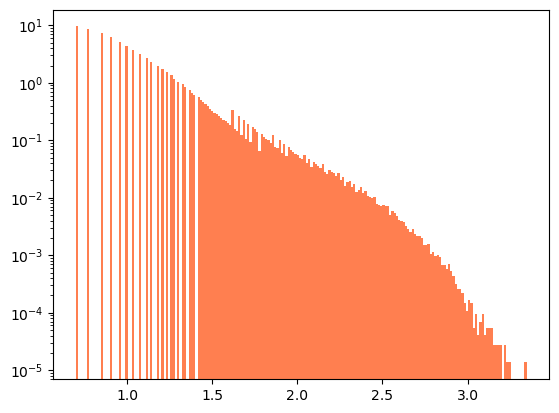

In [11]:
import matplotlib.pyplot as plt
plt.hist(np.log10(lengths[np.nonzero(lengths)[0]]), bins = 200, 
         histtype = 'stepfilled', density = True, 
         log = True, color = 'coral', label = 'Распределение длин событий')
#plt.xscale("log")
plt.show

In [81]:
np.where(lengths==0)[0].shape[0]/lengths.shape[0]

0.036658244457577434

In [87]:
np.nonzero(lengths)[0]

array([       0,        1,        2, ..., 10815845, 10815846, 10815847])